## Separa os dados em treino e teste, treina o modelo, faz os testes, verifica os resultados, faz os ajustes necessários e avalia se o modelo pode ser usado para predizer o consumo de cerveja.

In [1]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', None) # permite exibição de todas as linhas
pd.set_option('display.max_columns', None) # permite exibição de todas as colunas
import warnings
warnings.simplefilter('ignore') # inibe avisos de warning

In [2]:
# le os dados do dataset tratado recebendo em formato de dataframe
dfx = pd.read_csv('arquivos_tratados/df_consumo_cerveja.csv')

In [3]:
# verificando se todos os dados foram carregados
dfx.shape

(365, 7)

In [4]:
# verifica as colunas e linhas carregadas
dfx.head(3)

,Data,temp_media,temp_min,temp_max,precip_mm,fim_semana,cons_litros
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


In [5]:
# separa as variáveis: dependente_y e independentes_x
# as variáveis independentes (x) são separadas da variável dependente (y) em dataframes diferentes
Xi = dfx[["temp_media", "temp_max", 'fim_semana']]
yi = dfx[['cons_litros']]

In [6]:
# verifica o Dtype das variáveis independentes
print(Xi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_media  365 non-null    float64
 1   temp_max    365 non-null    float64
 2   fim_semana  365 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB
None


In [7]:
# Faz a separação dos dados de treino X_train e y_train e de teste X_test e y_test
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.30, train_size=0.70, random_state=2)

In [8]:
# Criando a arquitetura da rede neural:
k_model = Sequential() # cria o modelo

k_model.add(Dense(units=5, # inclui uma camada intermediária com 5 neurônios
                 activation='relu', # função de ativação
                 input_dim=Xi_train.shape[1])) # passa a dimensão do df xi_train

k_model.add(Dense(units=1, # inclui a camada de saída com 1 neurônio apenas (temos 1 variável de saída)
                 activation='linear')) # função de ativação

In [9]:
# compila o modelo:
k_model.compile(loss='mse', # função de perda/custo, ajuda a minimizar o erro, diferença do previsto e calculado
                            # mse(erro quadrático médio) mede a quantidade de erros
                optimizer='adam', # otimização de adam, ajuda a aprender com eficiência e convergir para soluções
                                  # ideais
                metrics=['mae']) # métricas a serem avaliadas, mae(erro médio absoluto)

In [10]:
# treina a rede neural:
resultado = k_model.fit(Xi_train, yi_train, # dados de treino
                       epochs=200, # determina quantas vezes o modelo passará pelo conjunto de treinamento 
                                   # xi_train e yi_train
                       batch_size=32, # determina o nro de exemplos(linhas) contido no conjunto de treinamento, que
                                      # será utilizado de uma vez para atualizar os pesos antes de prosseguir com 
                                      # o treinamento
                       validation_data=(Xi_test, yi_test)) # ajuda a achar o ponto ideal do treinamento evitando
                                                           # overfit e underfit 

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - loss: 178.5571 - mae: 12.8936 - val_loss: 168.3188 - val_mae: 12.5544
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 171.9090 - mae: 12.6108 - val_loss: 153.0079 - val_mae: 11.9377
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 152.1419 - mae: 11.8552 - val_loss: 138.6210 - val_mae: 11.3274
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 136.4274 - mae: 11.1541 - val_loss: 125.2841 - val_mae: 10.7305
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 124.0134 - mae: 10.6579 - val_loss: 112.9419 - val_mae: 10.1466
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 111.2617 - mae: 10.0298 - val_loss: 101.5037 - val_mae: 9.5735
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 106.9482 - mae: 9.7867 - val_loss: 90.9715 - val_mae: 9.0134
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 91.4158 - mae: 8.9570 - val_loss: 81.3999 - val_mae: 8.4719
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━

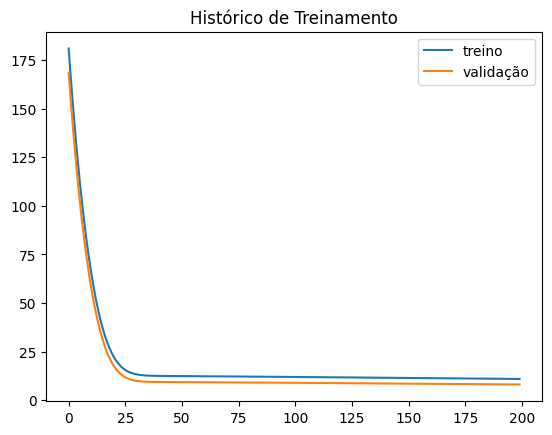

In [11]:
# Plotando gráfico do histórico de treinamento, verificando o erro de treino e de teste
plt.plot(resultado.history["loss"], label="loss")
plt.plot(resultado.history["val_loss"], label="val_loss")
plt.title('Histórico de Treinamento')
plt.legend(['treino', 'validação'])
plt.show()

In [12]:
# o df de teste tem 3 colunas (variáveis independentes)
Xi_test.shape

(110, 3)

In [13]:
# fazendo uma predição com os dados de teste
# será feito uma predição para cada linha do xi_test na mesma unidade de cons_litros
xi_teste_pred = k_model.predict(Xi_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [14]:
# exibe o array com o resultado da predição
xi_teste_pred

array([[23.284544],
       [20.02013 ],
       [25.278364],
       [17.59842 ],
       [20.69551 ],
       [26.569658],
       [23.943375],
       [18.515877],
       [19.845976],
       [27.09579 ],
       [25.685785],
       [29.941963],
       [29.668304],
       [27.274998],
       [26.022215],
       [30.332123],
       [27.102394],
       [25.791733],
       [27.223272],
       [29.18956 ],
       [22.836277],
       [21.709364],
       [25.580715],
       [23.911407],
       [24.017576],
       [26.662907],
       [19.609434],
       [25.21864 ],
       [24.416292],
       [23.57498 ],
       [29.207048],
       [19.13992 ],
       [27.427843],
       [29.829473],
       [26.510384],
       [20.292688],
       [24.341084],
       [17.97637 ],
       [26.031704],
       [29.634716],
       [21.253222],
       [29.187225],
       [34.50301 ],
       [22.655293],
       [25.34735 ],
       [27.48757 ],
       [16.991869],
       [26.395113],
       [19.58974 ],
       [21.796165],


In [15]:
# salva o modelo de árvore de decisão (faz o deploy)
# o modelo treinado e aprovado, agora é salvo em um arquivo pkl para ser utilizado em futuras aplicações
joblib.dump(xi_teste_pred, "modelos/consumo_cerveja_keras_model.pkl")

['modelos/consumo_cerveja_keras_model.pkl']